# Main for cutting calibration videos

Import function from video_cut_functions, you can change the path if the file is somewhere else.

In [1]:
import sys
import shutil

sys.path.append('DeepProprioception/Vision_Project')
from video_cut_functions import *

### Get videos

Get videos and experiment information path. It will create a dictionnary if multiple runs of calibration were taken that day. Videos should be stored in there specific camera folder, the later should be located in according to a specific date directory name.

In [2]:
date = "20220802"
videos, info = get_videos(date)
print(info)
print("Found the following videos:", videos)

{'cal_1': '/mnt/sdb2/DeepDraw/Calibration_videos/20220802_calibration/20220802_cal1_calibration_video_recording_info.csv', 'cal_2': '/mnt/sdb2/DeepDraw/Calibration_videos/20220802_calibration/20220802_cal2_calibration_video_recording_info.csv'}
Found the following videos: {'cal_1': ['/mnt/sdb2/DeepDraw/Calibration_videos/20220802_calibration/Camera_1/20220802_cal1_calibration_camera1_run0.mp4', '/mnt/sdb2/DeepDraw/Calibration_videos/20220802_calibration/Camera_2/20220802_cal1_calibration_camera2_run0.mp4'], 'cal_2': ['/mnt/sdb2/DeepDraw/Calibration_videos/20220802_calibration/Camera_1/20220802_cal2_calibration_camera1_run0.mp4', '/mnt/sdb2/DeepDraw/Calibration_videos/20220802_calibration/Camera_2/20220802_cal2_calibration_camera2_run0.mp4']}


### Find light pixel position

You can extract multiple frames from this video to locate the laser or LED position in pixel. It can only be seen by pointing with the mouse if you are using `%matplotlib notebook`, You can also zoom in using the notebook features on the bottom of the figures. Frames are given in seconds and you can see the duration of the video to select the lastest frames. The plot function will show figures for each run, frame in each lines and both cameras on left and right sides.

In [3]:
videos

{'cal_1': ['/mnt/sdb2/DeepDraw/Calibration_videos/20220802_calibration/Camera_1/20220802_cal1_calibration_camera1_run0.mp4',
  '/mnt/sdb2/DeepDraw/Calibration_videos/20220802_calibration/Camera_2/20220802_cal1_calibration_camera2_run0.mp4'],
 'cal_2': ['/mnt/sdb2/DeepDraw/Calibration_videos/20220802_calibration/Camera_1/20220802_cal2_calibration_camera1_run0.mp4',
  '/mnt/sdb2/DeepDraw/Calibration_videos/20220802_calibration/Camera_2/20220802_cal2_calibration_camera2_run0.mp4']}

Duration of : 20220802_cal1_calibration_camera1_run0.mp4  :  1148.47
Duration of : 20220802_cal1_calibration_camera2_run0.mp4  :  1148.57
Duration of : 20220802_cal2_calibration_camera1_run0.mp4  :  423.3
Duration of : 20220802_cal2_calibration_camera2_run0.mp4  :  423.33


<IPython.core.display.Javascript object>


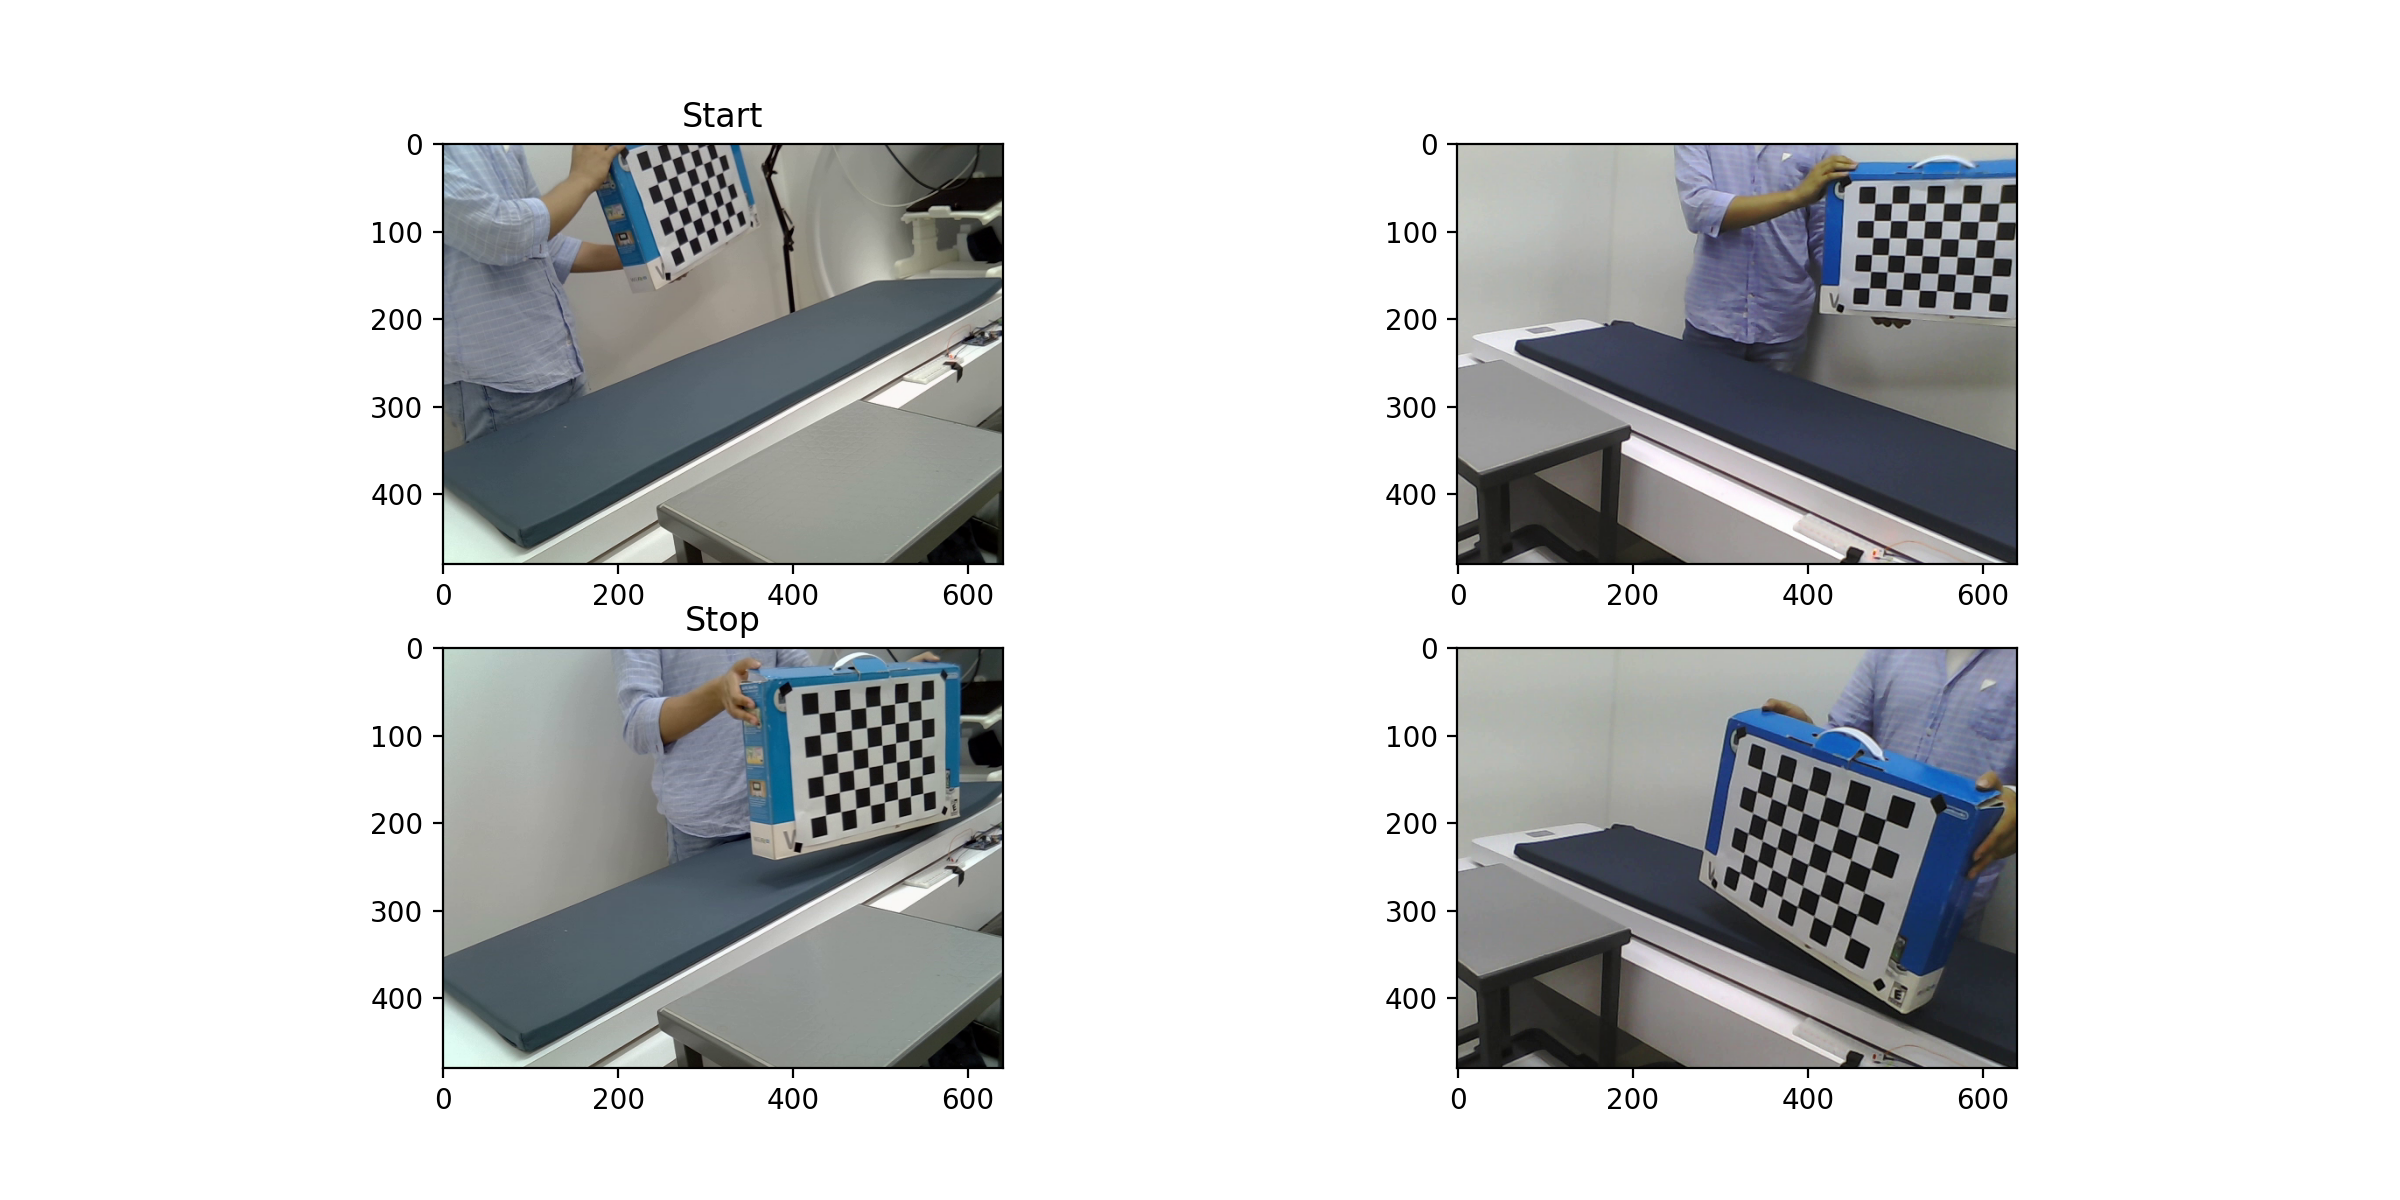

<IPython.core.display.Javascript object>


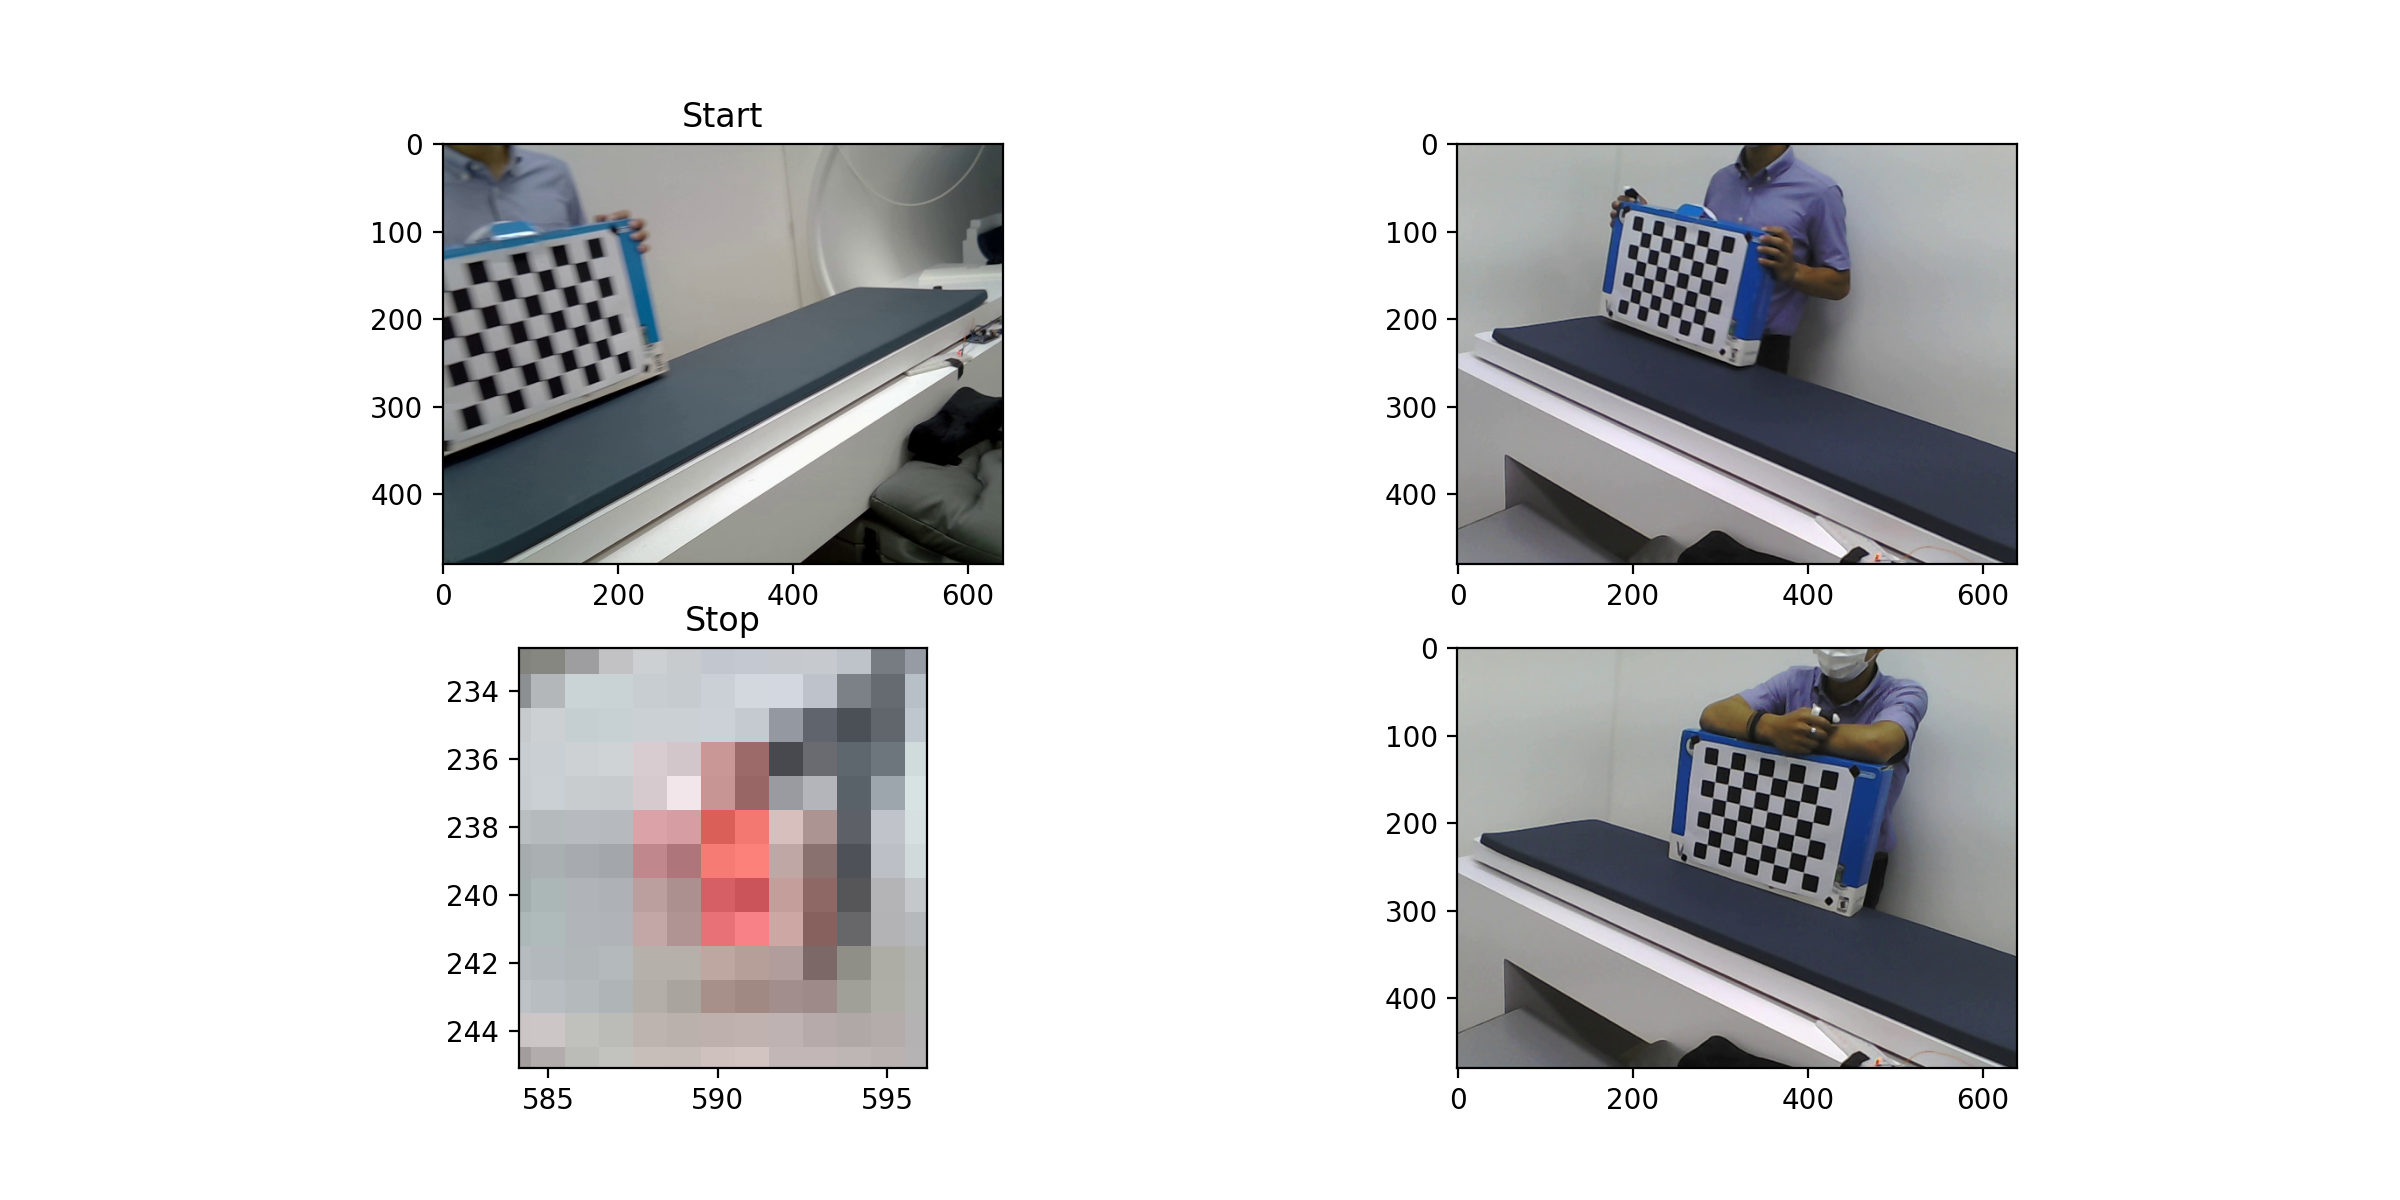

In [10]:
%matplotlib notebook

frames = [3, 423.2]
img_dict = extract_one_frame(videos, frames = frames)
plot_all_frames(img_dict, len(frames), typeofvid = "calib", frames = frames)

### From light variation, get start and stop times

You can insert the Light location in pixel in the `led_locations` variable for each run, in start (beggining of the video) and stop (end of the video) (in case the light moved) as `[[X_cam1, Y_cam1],[X_cam2, Y_cam2]]`. You can turn vis to `True` to see the values of the pixel before cut, this can provide informations on the noise level to regulate the threshold value.

In [ ]:
%matplotlib inline
led_locations = {"cal_1": {"start": [[520, 200],[405, 432]], "stop": [[521, 200],[404, 432]]},
                 "cal_2": {"start": [[524, 202],[405, 432]], "stop": [[522, 205],[405, 432]]},
                 "cal_4": {"start": [[527, 200],[440, 440]], "stop": [[527, 200],[440, 440]]}}
start_list, stop_list = get_startendpoint(videos, led_locations, threshold = 35, radius = 1, window_size = 80, vis = False)
print(start_list, stop_list)

iteration for video /mnt/sdb2/DeepDraw/Calibration_videos/20220802_calibration/Camera_1/20220802_cal1_calibration_camera1_run0.mp4


32it [00:00, 1007.40it/s]


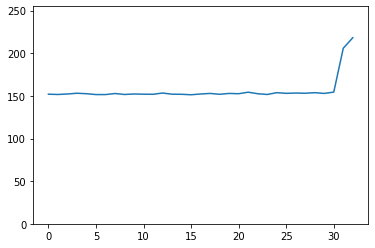

566it [00:00, 1465.93it/s]


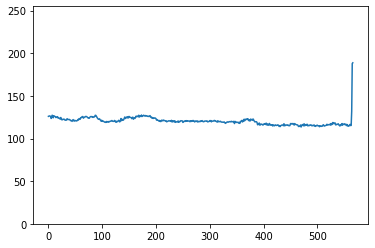

iteration for video /mnt/sdb2/DeepDraw/Calibration_videos/20220802_calibration/Camera_2/20220802_cal1_calibration_camera2_run0.mp4


33it [00:00, 1574.67it/s]


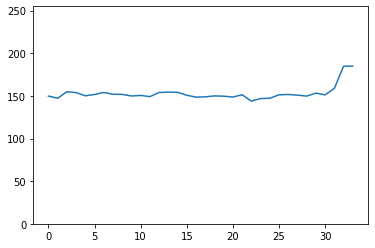

564it [00:00, 1408.38it/s]


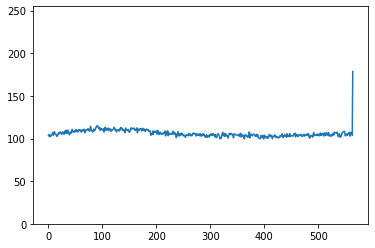

iteration for video /mnt/sdb2/DeepDraw/Calibration_videos/20220802_calibration/Camera_1/20220802_cal2_calibration_camera1_run0.mp4


32it [00:00, 1289.33it/s]


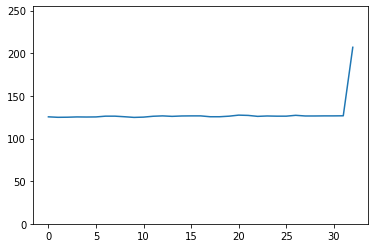

568it [00:00, 1519.33it/s]


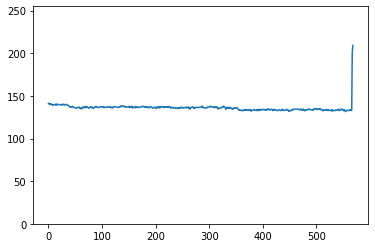

iteration for video /mnt/sdb2/DeepDraw/Calibration_videos/20220802_calibration/Camera_2/20220802_cal2_calibration_camera2_run0.mp4


32it [00:00, 1150.39it/s]


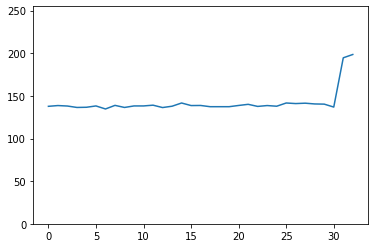

567it [00:00, 1369.05it/s]


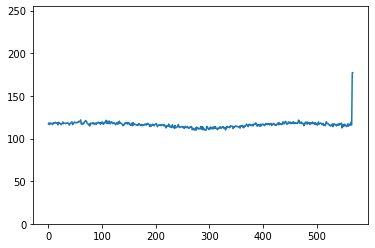

{'cal_1': [32, 33], 'cal_2': [32, 32]} {'cal_1': [34420, 34421], 'cal_2': [12667, 12666]}


In [3]:
%matplotlib inline
led_locations = {"cal_1": {"start": [[580, 242],[476, 468]], "stop": [[580, 242],[477, 467]]},
                 "cal_2": {"start": [[589, 238],[480, 473]], "stop": [[590, 240],[480, 473]]}}
start_list, stop_list = get_startendpoint(videos, led_locations, threshold = 35, radius = 1, window_size = 20, vis = True)
print(start_list, stop_list)

In [5]:
# %matplotlib inline
# start_list, stop_list = get_startend(videos, led_locations, threshold = 35, radius = 1)
# print(start_list, stop_list)

### Fine cut videos

Now you can cut the videos according to start and stop times

In [4]:
fcut_output_paths = get_output_paths(videos)
cut_all_videos(videos, start_list, stop_list, fcut_output_paths, frame = True)

Moviepy - Building video /mnt/sdb2/DeepDraw/Calibration_videos/20220802_calibration/Camera_1/fcut/20220802_cal1_calibration_camera1_run0_fcut.mp4.
Moviepy - Writing video /mnt/sdb2/DeepDraw/Calibration_videos/20220802_calibration/Camera_1/fcut/20220802_cal1_calibration_camera1_run0_fcut.mp4



Moviepy - Done !
Moviepy - video ready /mnt/sdb2/DeepDraw/Calibration_videos/20220802_calibration/Camera_1/fcut/20220802_cal1_calibration_camera1_run0_fcut.mp4
Moviepy - Building video /mnt/sdb2/DeepDraw/Calibration_videos/20220802_calibration/Camera_2/fcut/20220802_cal1_calibration_camera2_run0_fcut.mp4.
Moviepy - Writing video /mnt/sdb2/DeepDraw/Calibration_videos/20220802_calibration/Camera_2/fcut/20220802_cal1_calibration_camera2_run0_fcut.mp4



Moviepy - Done !
Moviepy - video ready /mnt/sdb2/DeepDraw/Calibration_videos/20220802_calibration/Camera_2/fcut/20220802_cal1_calibration_camera2_run0_fcut.mp4
Moviepy - Building video /mnt/sdb2/DeepDraw/Calibration_videos/20220802_calibration/Camera_1/fcut/20220802_cal2_calibration_camera1_run0_fcut.mp4.
Moviepy - Writing video /mnt/sdb2/DeepDraw/Calibration_videos/20220802_calibration/Camera_1/fcut/20220802_cal2_calibration_camera1_run0_fcut.mp4



Moviepy - Done !
Moviepy - video ready /mnt/sdb2/DeepDraw/Calibration_videos/20220802_calibration/Camera_1/fcut/20220802_cal2_calibration_camera1_run0_fcut.mp4
Moviepy - Building video /mnt/sdb2/DeepDraw/Calibration_videos/20220802_calibration/Camera_2/fcut/20220802_cal2_calibration_camera2_run0_fcut.mp4.
Moviepy - Writing video /mnt/sdb2/DeepDraw/Calibration_videos/20220802_calibration/Camera_2/fcut/20220802_cal2_calibration_camera2_run0_fcut.mp4



Moviepy - Done !
Moviepy - video ready /mnt/sdb2/DeepDraw/Calibration_videos/20220802_calibration/Camera_2/fcut/20220802_cal2_calibration_camera2_run0_fcut.mp4


### Stretch videos

If videos have a different framing rate, you need to stretch the videos according to the experiment info times and set the fps to 30.

In [5]:
fcut_videos = fcut_output_paths
output_path_str = get_output_paths(videos, stretch =True)
print(output_path_str)
stretch_videos(fcut_videos, info, output_path_str, exp_type = 'calibration')

{'cal_1': ['/mnt/sdb2/DeepDraw/Calibration_videos/20220802_calibration/Camera_1/str/20220802_cal1_calibration_camera1_run0_str.mp4', '/mnt/sdb2/DeepDraw/Calibration_videos/20220802_calibration/Camera_2/str/20220802_cal1_calibration_camera2_run0_str.mp4'], 'cal_2': ['/mnt/sdb2/DeepDraw/Calibration_videos/20220802_calibration/Camera_1/str/20220802_cal2_calibration_camera1_run0_str.mp4', '/mnt/sdb2/DeepDraw/Calibration_videos/20220802_calibration/Camera_2/str/20220802_cal2_calibration_camera2_run0_str.mp4']}
/mnt/sdb2/DeepDraw/Calibration_videos/20220802_calibration/20220802_cal1_calibration_video_recording_info.csv
original duration 1146.27
1149.25388
Moviepy - Building video /mnt/sdb2/DeepDraw/Calibration_videos/20220802_calibration/Camera_1/str/20220802_cal1_calibration_camera1_run0_str.mp4.
Moviepy - Writing video /mnt/sdb2/DeepDraw/Calibration_videos/20220802_calibration/Camera_1/str/20220802_cal1_calibration_camera1_run0_str.mp4



Moviepy - Done !
Moviepy - video ready /mnt/sdb2/DeepDraw/Calibration_videos/20220802_calibration/Camera_1/str/20220802_cal1_calibration_camera1_run0_str.mp4
original duration 1146.27
1149.28488
Moviepy - Building video /mnt/sdb2/DeepDraw/Calibration_videos/20220802_calibration/Camera_2/str/20220802_cal1_calibration_camera2_run0_str.mp4.
Moviepy - Writing video /mnt/sdb2/DeepDraw/Calibration_videos/20220802_calibration/Camera_2/str/20220802_cal1_calibration_camera2_run0_str.mp4



Moviepy - Done !
Moviepy - video ready /mnt/sdb2/DeepDraw/Calibration_videos/20220802_calibration/Camera_2/str/20220802_cal1_calibration_camera2_run0_str.mp4
/mnt/sdb2/DeepDraw/Calibration_videos/20220802_calibration/20220802_cal2_calibration_video_recording_info.csv
original duration 421.17
423.55955
Moviepy - Building video /mnt/sdb2/DeepDraw/Calibration_videos/20220802_calibration/Camera_1/str/20220802_cal2_calibration_camera1_run0_str.mp4.
Moviepy - Writing video /mnt/sdb2/DeepDraw/Calibration_videos/20220802_calibration/Camera_1/str/20220802_cal2_calibration_camera1_run0_str.mp4



Moviepy - Done !
Moviepy - video ready /mnt/sdb2/DeepDraw/Calibration_videos/20220802_calibration/Camera_1/str/20220802_cal2_calibration_camera1_run0_str.mp4
original duration 421.13
423.57448
Moviepy - Building video /mnt/sdb2/DeepDraw/Calibration_videos/20220802_calibration/Camera_2/str/20220802_cal2_calibration_camera2_run0_str.mp4.
Moviepy - Writing video /mnt/sdb2/DeepDraw/Calibration_videos/20220802_calibration/Camera_2/str/20220802_cal2_calibration_camera2_run0_str.mp4



Moviepy - Done !
Moviepy - video ready /mnt/sdb2/DeepDraw/Calibration_videos/20220802_calibration/Camera_2/str/20220802_cal2_calibration_camera2_run0_str.mp4


Finally you can extract pairs of calibration frames from videos, folder will be created in the working directory with the run names. The calibration frames are in a format compatible with the 3DeepLabCut pipeline.

### Generate Calibration frames

In [6]:
print(info)

{'cal_1': '/mnt/sdb2/DeepDraw/Calibration_videos/20220802_calibration/20220802_cal1_calibration_video_recording_info.csv', 'cal_2': '/mnt/sdb2/DeepDraw/Calibration_videos/20220802_calibration/20220802_cal2_calibration_video_recording_info.csv'}


In [7]:
output_folder = os.path.dirname(info[list(info.keys())[0]])
str_videos = output_path_str
extract_frames(str_videos, output_folder, n_frames = 200)

100%|██████████| 200/200 [00:24<00:00,  8.08it/s]


### Copy calibration frames in 3DeepLabCut project

If you already created a 3DLC project, you can copy the calibration frames in the project folder. Only one run should be used as calibration frames for a project.

In [5]:
info

{'cal_1': '/mnt/sdb2/DeepDraw/Calibration_videos/20220801_calibration/20220801_cal1_calibration_video_recording_info.csv',
 'cal_2': '/mnt/sdb2/DeepDraw/Calibration_videos/20220801_calibration/20220801_cal2_calibration_video_recording_info.csv',
 'cal_4': '/mnt/sdb2/DeepDraw/Calibration_videos/20220801_calibration/20220801_cal4_calibration_video_recording_info.csv'}

In [7]:
cal_num = 2

project_name = '/mnt/sdb2/DeepDraw/3DLC_project/20220801_DP01_emg-YH-2022-08-22-3d/'

date = "20220801"
videos, info = get_videos(date)
output_folder = os.path.dirname(info['cal_{}'.format(cal_num)])

project_folder = '/mnt/sdb2/DeepDraw/3DLC_project'
src_fo = os.path.join(output_folder, 'cal_{}'.format(cal_num))
src_fi = os.listdir(src_fo)
dst = os.path.join(project_folder, project_name, 'calibration_images')
for file in src_fi:
#     shutil.copy(os.path.join(src_fo,file), dst) #It doesn't work for no reasonable reason
    os.system("cp {} {}".format(os.path.join(src_fo,file), dst))